## Bank Telemarketing Campaign Case Study.

The primary objective of this project is to perform end-to-end EDA on the dataset to gain insights into customer behavior and preferences. By analyzing various factors influencing the response rate, we aim to provide actionable recommendations to the bank on areas where they can focus their efforts to improve the effectiveness of future marketing campaigns.

#### Problem Statement:

 

The bank provides financial services/products such as savings accounts, current accounts, debit cards, etc. to its customers. In order to increase its overall revenue, the bank conducts various marketing campaigns for its financial products such as credit cards, term deposits, loans, etc. These campaigns are intended for the bank’s existing customers. However, the marketing campaigns need to be cost-efficient so that the bank not only increases their overall revenues but also the total profit. You need to apply your knowledge of EDA on the given dataset to analyse the patterns and provide inferences/solutions for the future marketing campaign.

The bank conducted a telemarketing campaign for one of its financial products ‘Term Deposits’ to help foster long-term relationships with existing customers. The dataset contains information about all the customers who were contacted during a particular year to open term deposit accounts.

Your target is to do end to end EDA on this bank telemarketing campaign data set to infer knowledge that where bank has to put more effort to improve it's positive response rate. 

#### Importing the libraries.

In [1]:
#import the warnings.
import warnings
warnings.filterwarnings("ignore")

In [2]:
#import the useful libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Session- 2, Data Cleaning 

#### Read in the Data set. 

In [3]:
#read the data set of "bank telemarketing campaign" in inp0.
inp0= pd.read_csv("bank_marketing_updated_v1.csv")

In [4]:
#Print the head of the data frame.
inp0.head()

,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


In [5]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45213 entries, 0 to 45212
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   banking marketing  45213 non-null  object
 1   Unnamed: 1         45192 non-null  object
 2   Unnamed: 2         45213 non-null  object
 3   Unnamed: 3         45212 non-null  object
 4   Unnamed: 4         45213 non-null  object
 5   Unnamed: 5         45212 non-null  object
 6   Unnamed: 6         45213 non-null  object
 7   Unnamed: 7         45212 non-null  object
 8   Unnamed: 8         45213 non-null  object
 9   Unnamed: 9         45212 non-null  object
 10  Unnamed: 10        45213 non-null  object
 11  Unnamed: 11        45212 non-null  object
 12  Unnamed: 12        45163 non-null  object
 13  Unnamed: 13        45213 non-null  object
 14  Unnamed: 14        45212 non-null  object
 15  Unnamed: 15        45212 non-null  object
 16  Unnamed: 16        45212 non-null  objec

###  Fixing the Rows and Columns 

#### Read the file without unnecessary headers.

In [6]:
#read the file in inp0 without first two rows as it is of no use.
inp0= pd.read_csv("bank_marketing_updated_v1.csv", skiprows=2)

In [7]:
#print the head of the data frame.
inp0.head(10)

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no
5,6,35.0,100000,231,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",139 sec,1,-1,0,unknown,no
6,7,28.0,100000,447,single,"management,tertiary",no,no,yes,yes,unknown,5,"may, 2017",217 sec,1,-1,0,unknown,no
7,8,42.0,120000,2,divorced,"entrepreneur,tertiary",no,yes,yes,no,unknown,5,"may, 2017",380 sec,1,-1,0,unknown,no
8,9,58.0,55000,121,married,"retired,primary",yes,no,yes,no,unknown,5,"may, 2017",50 sec,1,-1,0,unknown,no
9,10,43.0,60000,593,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",55 sec,1,-1,0,unknown,no


In [8]:
#print the information of variables to check their data types.
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45211 non-null  int64  
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
dtypes: float64(1), int64(7), 

In [9]:
#convert the age variable data type from float to integer.
inp0['age'].unique()

array([58., 44., 33., 47., 35., 28., 42., 43., 41., 29., 53., 57., 51.,
       45., 60., 56., 32., 25., 40., 39., 52., 46., 36., 49., 59., 37.,
       50., 54., 55., 48., 24., 38., 31., 30., 27., 34., 23., 26., nan,
       61., 22., 21., 20., 66., 62., 83., 75., 67., 70., 65., 68., 64.,
       69., 72., 71., 19., 76., 85., 63., 90., 82., 73., 74., 78., 80.,
       94., 79., 77., 86., 95., 81., 18., 89., 84., 87., 92., 93., 88.])

In [10]:
inp0['age'].isnull().sum()

20

In [11]:
inp0['age'] = inp0['age'].fillna(inp0['age'].mean()).astype('int')

In [12]:
inp0['age'].isnull().sum()

0

In [13]:
inp0['age'].unique()

array([58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 57, 51, 45, 60, 56, 32,
       25, 40, 39, 52, 46, 36, 49, 59, 37, 50, 54, 55, 48, 24, 38, 31, 30,
       27, 34, 23, 26, 61, 22, 21, 20, 66, 62, 83, 75, 67, 70, 65, 68, 64,
       69, 72, 71, 19, 76, 85, 63, 90, 82, 73, 74, 78, 80, 94, 79, 77, 86,
       95, 81, 18, 89, 84, 87, 92, 93, 88])

In [14]:
#print the average age of customers.
inp0['age'].mean()

40.93523699984517

#### Dropping customer id column. 

In [15]:
#drop the customer id as it is of no use.
inp0.drop('customerid', axis=1, inplace = True)

In [16]:
inp0.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,47,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,33,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


#### Dividing "jobedu" column into job and education categories. 

In [17]:
#Extract job in newly created 'job' column from "jobedu" column.
inp0['job']= inp0['jobedu'].apply(lambda x: x.split(',')[0])

In [18]:
inp0.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job
0,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management
1,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician
2,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur
3,47,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar
4,33,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown


In [19]:
#Extract education in newly created 'education' column from "jobedu" column.
inp0['education']= inp0['jobedu'].apply(lambda x: x.split(',')[1])

In [20]:
inp0.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [21]:
#drop the "jobedu" column from the dataframe.
inp0.drop('jobedu',axis=1, inplace=True)

In [22]:
inp0.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


### Impute/Remove missing values 

In [23]:
#count the missing values in age column.
inp0.isnull().sum()

age           0
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

In [24]:
#pring the shape of dataframe inp0
inp0.shape

(45211, 19)

#### handling missing values in month column

In [25]:
#count the missing values in month column in inp1.
inp0['month'].isnull().sum()

50

In [26]:
#print the percentage of each month in the data frame inp1.
missing_values_in_month = inp0['month'].isnull().sum()/45211 *100
missing_values_in_month

0.11059255490920351

In [27]:
#find the mode of month in inp1
month_mode = inp0['month'].mode()
month_mode

0    may, 2017
Name: month, dtype: object

In [28]:
inp0['month'].value_counts()

may, 2017    13747
jul, 2017     6888
aug, 2017     6240
jun, 2017     5335
nov, 2017     3968
apr, 2017     2931
feb, 2017     2646
jan, 2017     1402
oct, 2017      738
sep, 2017      576
mar, 2017      476
dec, 2017      214
Name: month, dtype: int64

In [29]:
# fill the missing values with mode value of month in inp1.
inp0['month'].fillna(inp0['month'].mode()[0], inplace = True)

In [30]:
#let's see the null values in the month column.
inp0['month'].isnull().sum()

0

In [31]:
inp0['month'].value_counts()

may, 2017    13797
jul, 2017     6888
aug, 2017     6240
jun, 2017     5335
nov, 2017     3968
apr, 2017     2931
feb, 2017     2646
jan, 2017     1402
oct, 2017      738
sep, 2017      576
mar, 2017      476
dec, 2017      214
Name: month, dtype: int64

#### handling missing values in response column 

In [32]:
#count the missing values in response column in inp1.
print(inp0['response'].value_counts())
print('Null_values_in_column = ' ,inp0['response'].isnull().sum())

no     39894
yes     5287
Name: response, dtype: int64
Null_values_in_column =  30


In [33]:
#calculate the percentage of missing values in response column. 
print('number_of_rows =',inp0['response'].shape[0])
print('Percentage_of_null_values_in_column =', inp0['response'].isnull().sum()/inp0['response'].shape[0] * 100)

number_of_rows = 45211
Percentage_of_null_values_in_column = 0.0663555329455221


Target variable is better of not imputed.
- Drop the records with missing values.

In [34]:
#drop the records with response missings in inp1.
inp1 = inp0[~inp0['response'].isnull()].copy()
inp1.shape

(45181, 19)

In [35]:
#calculate the missing values in each column of data frame: inp1.
inp1.isnull().sum()

age          0
salary       0
balance      0
marital      0
targeted     0
default      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
job          0
education    0
dtype: int64

#### handling pdays column. 

In [36]:
#describe the pdays column of inp1.
inp1['pdays'].describe()

count    45181.000000
mean        40.198601
std        100.134050
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

-1 indicates the missing values.
Missing value does not always be present as null.
How to handle it:

Objective is:
- you should ignore the missing values in the calculations
- simply make it missing - replace -1 with NaN.
- all summary statistics- mean, median etc. we will ignore the missing values of pdays.

In [ ]:
# inp1.loc[inp1.pdays<0,"pdays"] = np.NaN

In [37]:
#describe the pdays column with considering the -1 values.
inp1['pdays'].replace(-1, np.NaN, inplace=True)

In [38]:
inp1['pdays'].describe()

count    8251.000000
mean      224.596170
std       115.352191
min         1.000000
25%       133.000000
50%       195.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

In [39]:
inp1['pdays'].isnull().sum()

36930

### Handling Outliers 

#### Age variable 

In [40]:
#describe the age variable in inp1.
inp1['age'].describe()

count    45181.000000
mean        40.935349
std         10.616457
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

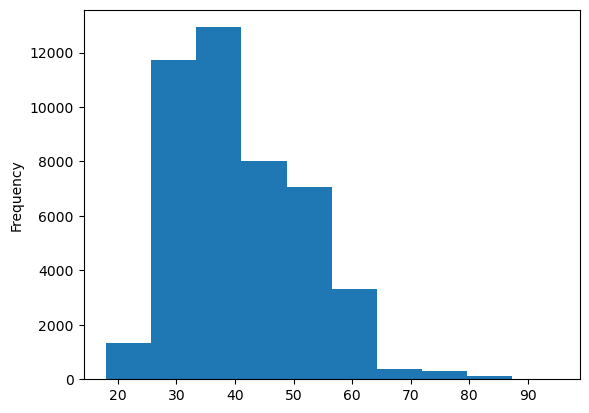

In [41]:
#plot the histogram of age variable.
inp1['age'].plot.hist()
plt.show()

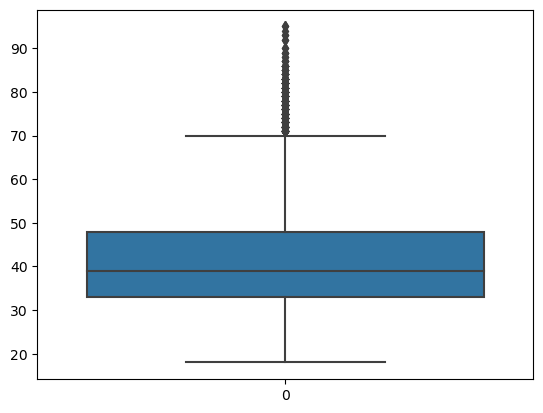

In [42]:
#plot the boxplot of age variable.
sns.boxplot(inp1['age'])
plt.show()

#### Salary variable 

In [43]:
#describe the salary variable of inp1.
inp1['salary'].describe()

count     45181.000000
mean      57005.046369
std       32089.163369
min           0.000000
25%       20000.000000
50%       60000.000000
75%       70000.000000
max      120000.000000
Name: salary, dtype: float64

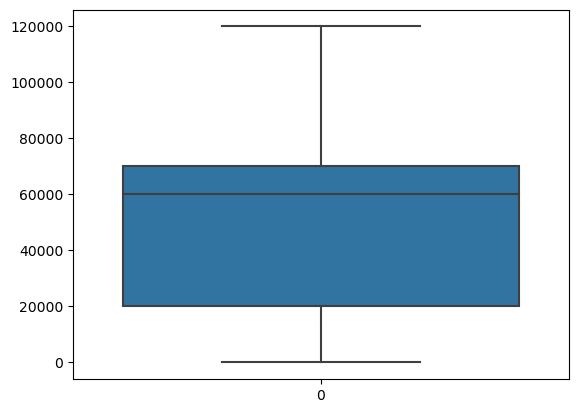

In [44]:
#plot the boxplot of salary variable.
sns.boxplot(inp1['salary'])
plt.show()

In [45]:
inp1[inp1['salary'] == 120000]

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
2,33,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,NaN,0,unknown,no,entrepreneur,secondary
7,42,120000,2,divorced,no,yes,yes,no,unknown,5,"may, 2017",380 sec,1,NaN,0,unknown,no,entrepreneur,tertiary
27,52,120000,113,married,yes,no,yes,yes,unknown,5,"may, 2017",127 sec,1,NaN,0,unknown,no,entrepreneur,secondary
55,38,120000,243,single,no,no,no,yes,unknown,5,"may, 2017",174 sec,1,NaN,0,unknown,no,entrepreneur,tertiary
94,57,120000,-37,divorced,yes,no,no,no,unknown,5,"may, 2017",173 sec,1,NaN,0,unknown,no,entrepreneur,secondary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45122,40,120000,262,single,no,no,yes,yes,unknown,26,"oct, 2017",0.283333333333333 min,1,NaN,0,unknown,no,entrepreneur,tertiary
45140,63,120000,3904,married,yes,no,no,no,telephone,8,"nov, 2017",6 min,1,96.0,4,success,yes,entrepreneur,secondary
45155,44,120000,121,married,yes,no,no,no,cellular,9,"nov, 2017",4.13333333333333 min,1,91.0,1,success,yes,entrepreneur,tertiary
45175,38,120000,2543,single,yes,no,no,no,cellular,11,"nov, 2017",5.95 min,3,93.0,5,success,yes,entrepreneur,secondary


#### Balance variable 

In [46]:
#describe the balance variable of inp1.
inp1['balance'].describe()

count     45181.000000
mean       1362.689936
std        3045.584521
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

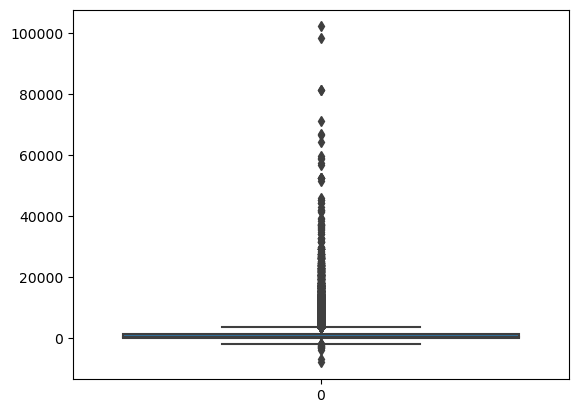

In [47]:
#plot the boxplot of balance variable.

sns.boxplot(inp1['balance'])
plt.show()

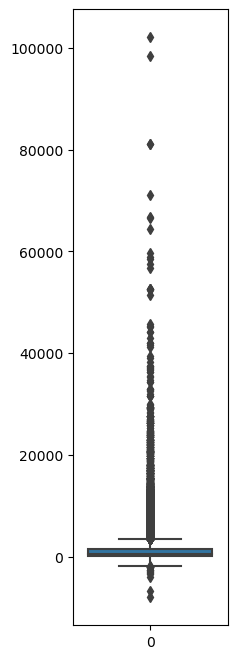

In [48]:
#plot the boxplot of balance variable after scaling in 8:2.
plt.figure(figsize=[2,8])
sns.boxplot(inp1['balance'])
plt.show()

In [49]:
#print the quantile (0.5, 0.7, 0.9, 0.95 and 0.99) of balance variable
inp1['balance'].quantile([0.6, 0.75, 0.90, 0.95, 0.99])

0.60      701.0
0.75     1428.0
0.90     3575.0
0.95     5769.0
0.99    13169.2
Name: balance, dtype: float64

###  Standardising values 

#### Duration variable

In [50]:
#describe the duration variable of inp1
inp1['duration'].describe()

count       45181
unique       2646
top       1.5 min
freq          138
Name: duration, dtype: object

In [51]:
inp1.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,NaN,0,unknown,no,management,tertiary
1,44,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,NaN,0,unknown,no,technician,secondary
2,33,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,NaN,0,unknown,no,entrepreneur,secondary
3,47,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,NaN,0,unknown,no,blue-collar,unknown
4,33,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,NaN,0,unknown,no,unknown,unknown


In [52]:
#convert the duration variable into single unit i.e. minutes. and remove the sec or min prefix.
inp1['duration'] = inp1['duration'].apply(lambda x: float(x.split()[0])/60 if x.find('sec')>0 else float(x.split()[0]))

In [53]:
#describe the duration variable
inp1['duration'].describe()

count    45181.000000
mean         4.302462
std          4.292520
min          0.000000
25%          1.716667
50%          3.000000
75%          5.316667
max         81.966667
Name: duration, dtype: float64

## Univariate Analysis 

### Categorical unordered univariate analysis 

Unordered data do not have the notion of high-low, more-less etc. Example:
- Type of loan taken by a person = home, personal, auto etc.
- Organisation of a person = Sales, marketing, HR etc.
- Job category of persone.
- Marital status of any one.


#### Marital status 

In [54]:
#calculate the percentage of each marital status category. 
marital_counts = inp1['marital'].value_counts()
marital_entries = len(inp1['marital'])
marital_percentage = (marital_counts/marital_entries)*100
marital_percentage

married     60.191231
single      28.290653
divorced    11.518116
Name: marital, dtype: float64

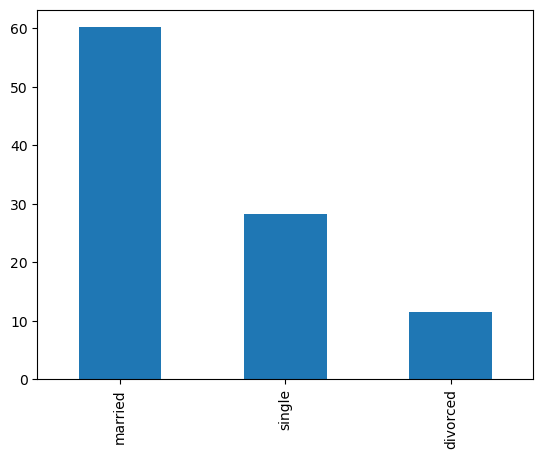

In [55]:
#plot the bar graph of percentage marital status categories
marital_percentage.plot(kind='bar')
plt.show()

#### Job  

In [56]:
#calculate the percentage of each job status category.
job_counts = inp1['job'].value_counts()
job_entries = len(inp1['job'])
job_percentage = (job_counts/job_entries)*100
job_percentage

blue-collar      21.528961
management       20.924725
technician       16.803524
admin.           11.434010
services          9.185277
retired           5.008743
self-employed     3.485979
entrepreneur      3.288993
unemployed        2.883956
housemaid         2.742303
student           2.076094
unknown           0.637436
Name: job, dtype: float64

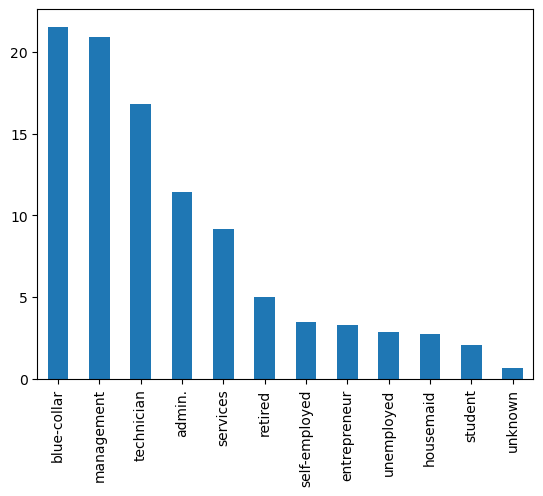

In [57]:
#plot the bar graph of percentage job categories
job_percentage.plot(kind='bar')
plt.show()

### Categorical ordered univariate analysis 

#### Education

In [58]:
#calculate the percentage of each education category.
education_categories_count = inp1['education'].value_counts()
education_entries = len(inp1['education'])
education_categories_percentage = (education_categories_count/education_entries)*100
education_categories_percentage

secondary    51.324672
tertiary     29.419446
primary      15.147960
unknown       4.107921
Name: education, dtype: float64

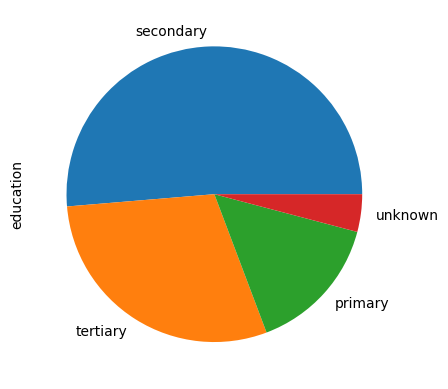

In [59]:
#plot the pie chart of education categories
education_categories_percentage.plot.pie()
#plt.pie(education_categories_percentage, labels = ['secondary','tertiary','primary','unknown'])
#plt.title('education_categories_percentage')
plt.show()

#### poutcome 

In [60]:
#calculate the percentage of each poutcome category.
poutcome_categories_count = inp1['poutcome'].value_counts()
poutcome_entries = len(inp1['poutcome'])
poutcome_categories_percentage = (poutcome_categories_count/poutcome_entries)*100
poutcome_categories_percentage

unknown    81.748965
failure    10.838627
other       4.070295
success     3.342113
Name: poutcome, dtype: float64

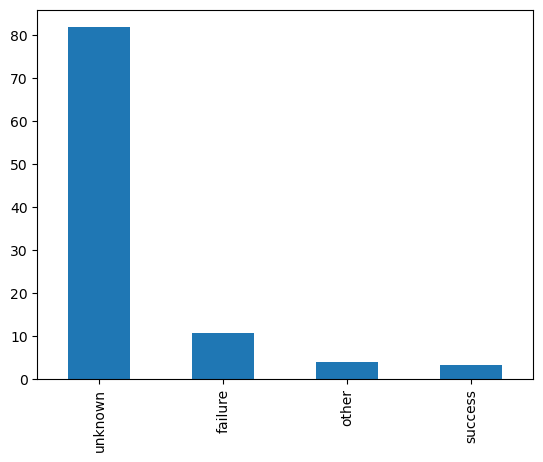

In [61]:
poutcome_categories_percentage.plot.bar()
plt.show()

#### Response the target variable 

In [62]:
#calculate the percentage of each response category.
response_categories_count = inp1['response'].value_counts()
response_entries = len(inp1['response'])
response_categories_percentage= (response_categories_count/response_entries)*100
response_categories_percentage

no     88.298178
yes    11.701822
Name: response, dtype: float64

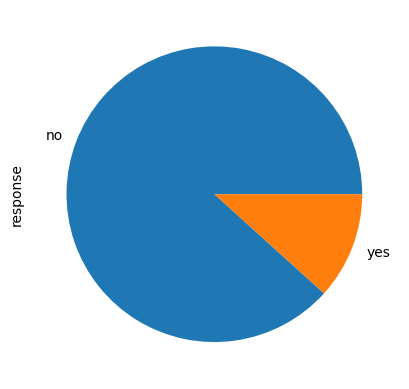

In [63]:
#plot the pie chart of response categories
response_categories_percentage.plot.pie()
plt.show()

## Bivariate and Multivariate Analysis

### Numeric- numeric analysis 

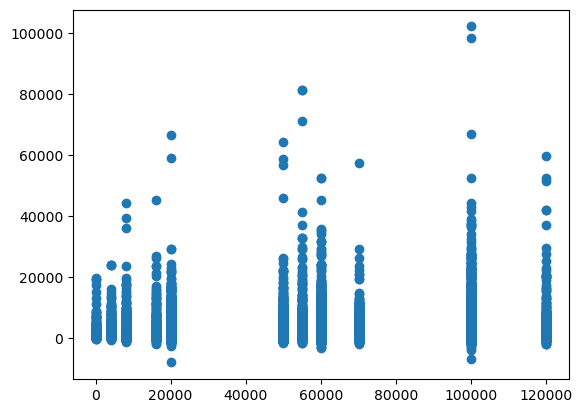

In [64]:
#plot the scatter plot of balance and salary variable in inp1
plt.scatter(inp1.salary, inp1.balance)
plt.show()

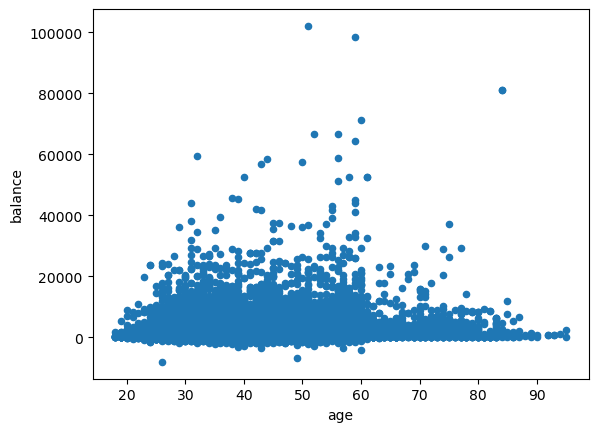

In [65]:
#plot the scatter plot of balance and age variable in inp1
inp1.plot.scatter(x='age', y='balance')
plt.show()

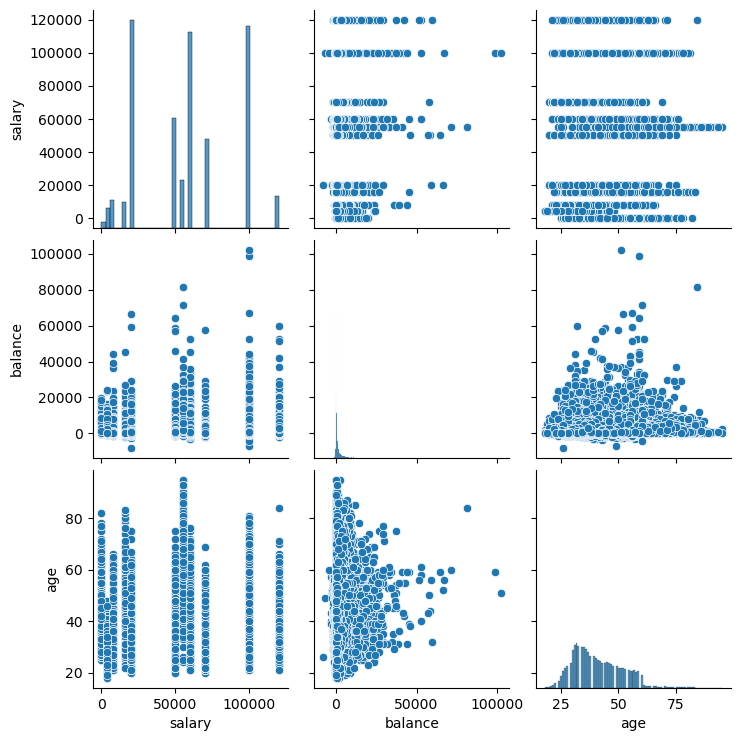

In [66]:
#plot the pair plot of salary, balance and age in inp1 dataframe.
sns.pairplot(data=inp1, vars=['salary','balance','age'])
plt.show()

#### Correlation heat map 

In [67]:
#plot the correlation matrix of salary, balance and age in inp1 dataframe.
inp1[['age','salary','balance']].corr()

,age,salary,balance
age,1.000000,0.024506,0.097705
salary,0.024506,1.000000,0.055453
balance,0.097705,0.055453,1.000000


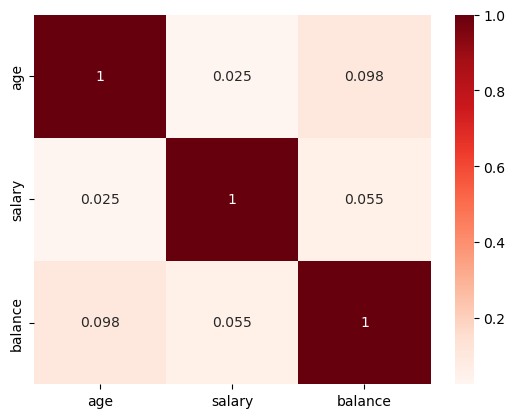

In [68]:
sns.heatmap(inp1[['age','salary','balance']].corr(),annot=True,cmap='Reds')
plt.show()

### Numerical categorical variable

#### Salary vs response 

In [69]:
#groupby the response to find the mean of the salary with response no & yes seperatly.
inp1.groupby("response")['salary'].mean()

response
no     56770.917933
yes    58771.704180
Name: salary, dtype: float64

In [70]:
#groupby the response to find the median of the salary with response no & yes seperatly.
inp1.groupby("response")['salary'].median()

response
no     60000.0
yes    60000.0
Name: salary, dtype: float64

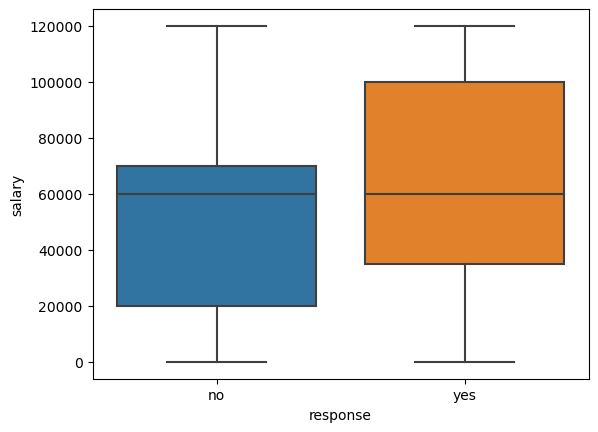

In [71]:
#plot the box plot of salary for yes & no responses.
sns.boxplot(data=inp1, x='response', y='salary')
plt.show()

#### Balance vs response 

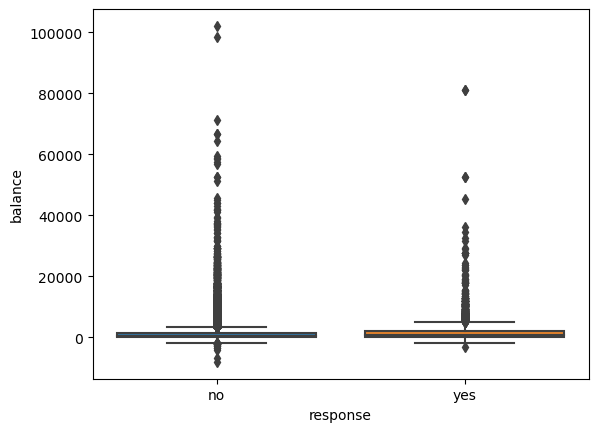

In [72]:
#plot the box plot of balance for yes & no responses.
sns.boxplot(data=inp1, x='response', y='balance')
plt.show()

In [73]:
#groupby the response to find the mean of the balance with response no & yes seperatly.
inp1.groupby('response')['balance'].mean()

response
no     1304.094525
yes    1804.832041
Name: balance, dtype: float64

In [74]:
#groupby the response to find the median of the balance with response no & yes seperatly.
inp1.groupby('response')['balance'].median()

response
no     417.0
yes    733.0
Name: balance, dtype: float64

##### 75th percentile 

In [75]:
#function to find the 75th percentile.
def p75(x):
    return np.quantile(x, 0.75)

In [76]:
#calculate the mean, median and 75th percentile of balance with response
inp1.groupby('response')['balance'].aggregate(['mean','median',p75])

,mean,median,p75
response,,,
no,1304.094525,417.0,1345.0
yes,1804.832041,733.0,2159.5


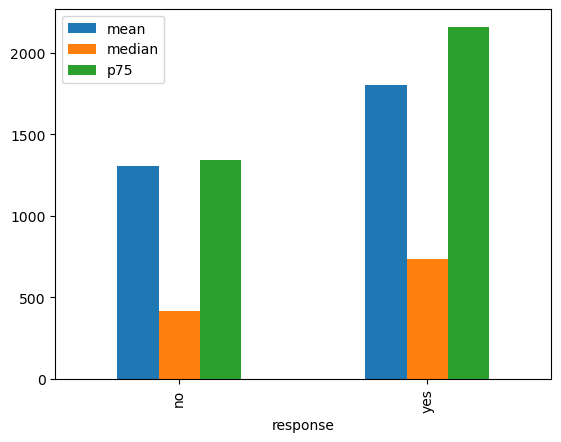

In [77]:
#plot the bar graph of balance's mean an median with response.
inp1.groupby('response')['balance'].aggregate(['mean','median',p75]).plot.bar()
plt.show()

#### Education vs salary 

In [78]:
#groupby the education to find the mean of the salary education category.
inp1.groupby('education')['salary'].mean()

education
primary      34220.192870
secondary    49739.143559
tertiary     82875.564249
unknown      46529.633621
Name: salary, dtype: float64

In [79]:
#groupby the education to find the median of the salary for each education category.
inp1.groupby('education')['salary'].median()

education
primary       20000.0
secondary     55000.0
tertiary     100000.0
unknown       50000.0
Name: salary, dtype: float64

#### Job vs salary

In [80]:
#groupby the job to find the mean of the salary for each job category.
inp1.groupby('job')['salary'].mean()

job
admin.            50000.0
blue-collar       20000.0
entrepreneur     120000.0
housemaid         16000.0
management       100000.0
retired           55000.0
self-employed     60000.0
services          70000.0
student            4000.0
technician        60000.0
unemployed         8000.0
unknown               0.0
Name: salary, dtype: float64

### Categorical categorical variable 

In [81]:
#create response_flag of numerical data type where response "yes"= 1, "no"= 0
inp1['response_flag'] = np.where(inp1.response == 'yes',1,0)

In [82]:
inp1.response_flag.value_counts()

0    39894
1     5287
Name: response_flag, dtype: int64

In [83]:
inp1.response.value_counts()

no     39894
yes     5287
Name: response, dtype: int64

In [84]:
inp1.response.value_counts(normalize=True)

no     0.882982
yes    0.117018
Name: response, dtype: float64

#### Education vs response rate

In [85]:
#calculate the mean of response_flag with different education categories.
inp1.groupby('education')['response_flag'].mean()

education
primary      0.086353
secondary    0.105610
tertiary     0.150090
unknown      0.135776
Name: response_flag, dtype: float64

#### Marital vs response rate 

In [86]:
#calculate the mean of response_flag with different marital status categories.
inp1.groupby('marital')['response_flag'].mean()

marital
divorced    0.119523
married     0.101269
single      0.149507
Name: response_flag, dtype: float64

<Axes: ylabel='marital'>

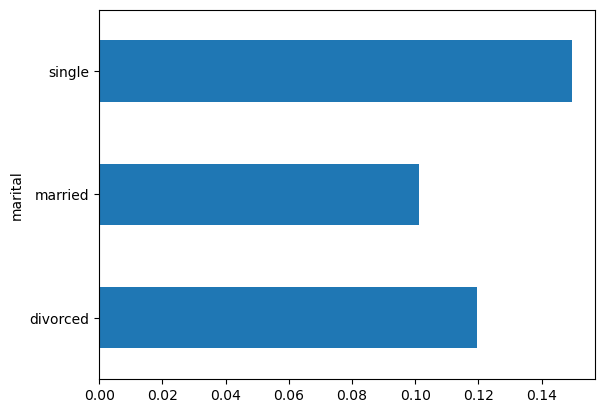

In [87]:
#plot the bar graph of marital status with average value of response_flag
inp1.groupby('marital')['response_flag'].mean().plot.barh()

#### Loans vs response rate 

<Axes: ylabel='loan'>

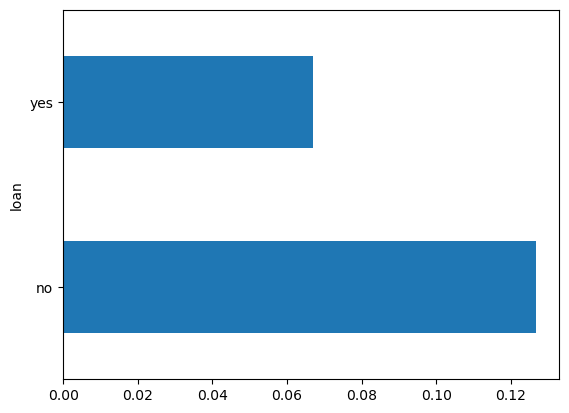

In [88]:
#plot the bar graph of personal loan status with average value of response_flag
inp1.groupby('loan')['response_flag'].mean().plot.barh()

#### Housing loans vs response rate 

<Axes: ylabel='housing'>

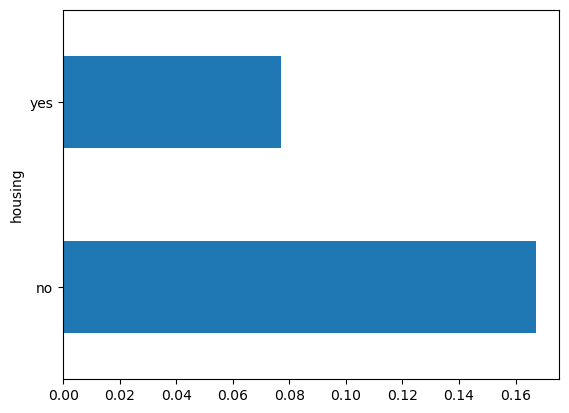

In [89]:
#plot the bar graph of housing loan status with average value of response_flag
inp1.groupby('housing')['response_flag'].mean().plot.barh()

#### Age vs response 

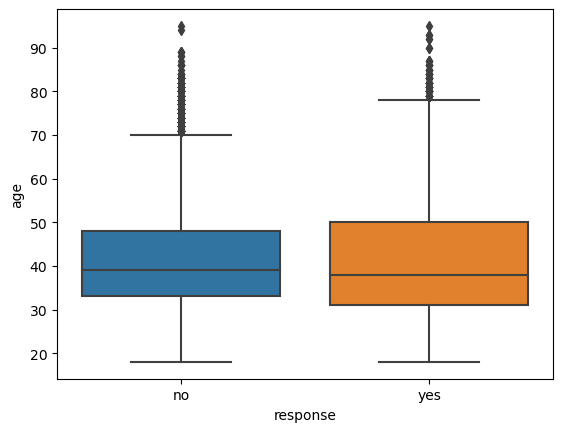

In [90]:
#plot the boxplot of age with response_flag
sns.boxplot(data=inp1, x='response', y='age')
plt.show()

##### making buckets from age columns 

In [91]:
#create the buckets of <30, 30-40, 40-50 50-60 and 60+ from age column.
pd.cut(inp1.age, [0,30,40,50,60,999], labels=['<30','30-40','40-50','50-60','60+'])

0        50-60
1        40-50
2        30-40
3        40-50
4        30-40
         ...  
45206    50-60
45207      60+
45208      60+
45209    50-60
45210    30-40
Name: age, Length: 45181, dtype: category
Categories (5, object): ['<30' < '30-40' < '40-50' < '50-60' < '60+']

In [92]:
inp1.age.head()

0    58
1    44
2    33
3    47
4    33
Name: age, dtype: int32

In [93]:
inp1['age_group'] = pd.cut(inp1.age, [0,30,40,50,60,999], labels=['<30','30-40','40-50','50-60','60+'])
inp1.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,response,job,education,response_flag,age_group
0,58,100000,2143,married,yes,no,yes,no,unknown,5,...,4.350000,1,NaN,0,unknown,no,management,tertiary,0,50-60
1,44,60000,29,single,yes,no,yes,no,unknown,5,...,2.516667,1,NaN,0,unknown,no,technician,secondary,0,40-50
2,33,120000,2,married,yes,no,yes,yes,unknown,5,...,1.266667,1,NaN,0,unknown,no,entrepreneur,secondary,0,30-40
3,47,20000,1506,married,no,no,yes,no,unknown,5,...,1.533333,1,NaN,0,unknown,no,blue-collar,unknown,0,40-50
4,33,0,1,single,no,no,no,no,unknown,5,...,3.300000,1,NaN,0,unknown,no,unknown,unknown,0,30-40


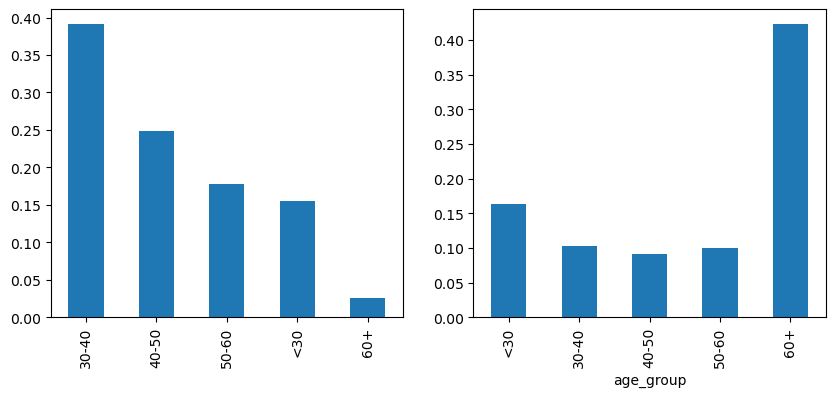

In [94]:
#plot the percentage of each buckets and average values of response_flag in each buckets. plot in subplots.
plt.figure(figsize = [10,4])
plt.subplot(1,2,1)
inp1.age_group.value_counts(normalize=True).plot.bar()
plt.subplot(1,2,2)
inp1.groupby(['age_group'])['response_flag'].mean().plot.bar()
plt.show()

<Axes: xlabel='job'>

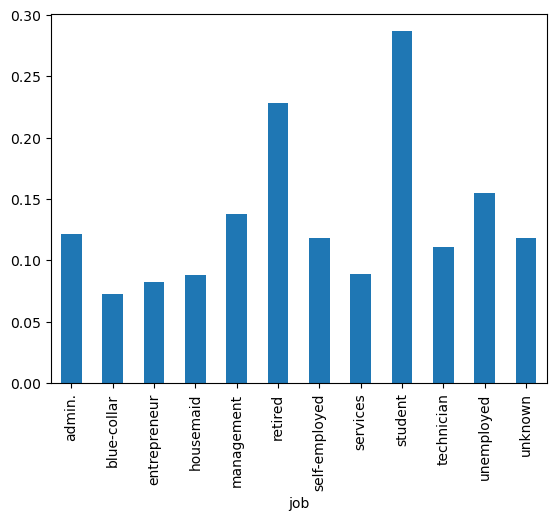

In [95]:
#plot the bar graph of job categories with response_flag mean value.
inp1.groupby('job')['response_flag'].mean().plot.bar()

In [96]:
inp1.groupby('job')['response_flag'].mean()

job
admin.           0.121951
blue-collar      0.072787
entrepreneur     0.082773
housemaid        0.087974
management       0.137614
retired          0.228016
self-employed    0.118095
services         0.088916
student          0.286780
technician       0.110643
unemployed       0.155027
unknown          0.118056
Name: response_flag, dtype: float64

### Multivariate analysis 

#### Education vs marital vs response 

<Axes: xlabel='marital', ylabel='education'>

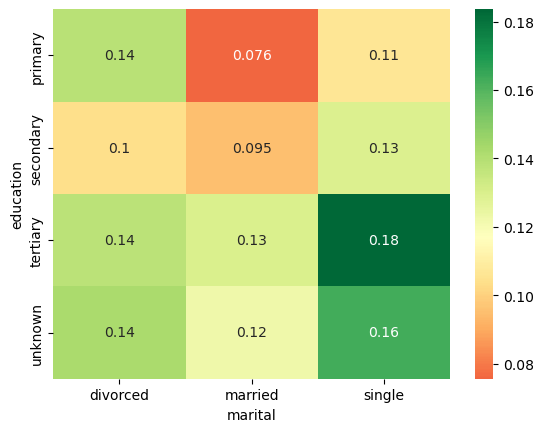

In [97]:
#create heat map of education vs marital vs response_flag
res = pd.pivot_table(data=inp1, index='education', columns='marital', values='response_flag')
sns.heatmap(res, annot=True, cmap='RdYlGn', center=0.117)

#### Job vs marital vs response 

<Axes: xlabel='marital', ylabel='job'>

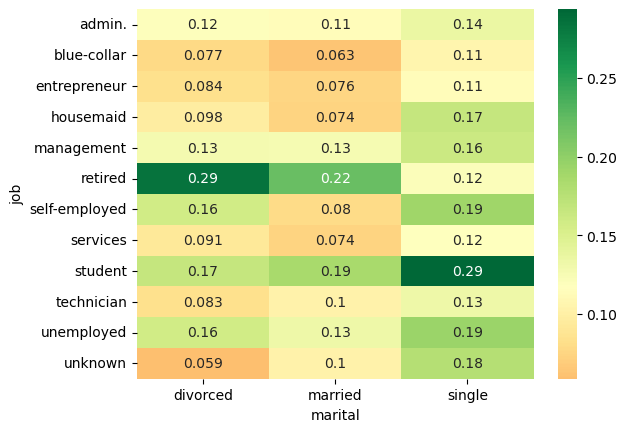

In [98]:
#create the heat map of Job vs marital vs response_flag.
res = pd.pivot_table(data=inp1, index='job', columns='marital', values='response_flag')
sns.heatmap(res, annot=True, cmap='RdYlGn', center=0.117)

#### Education vs poutcome vs response

<Axes: xlabel='poutcome', ylabel='education'>

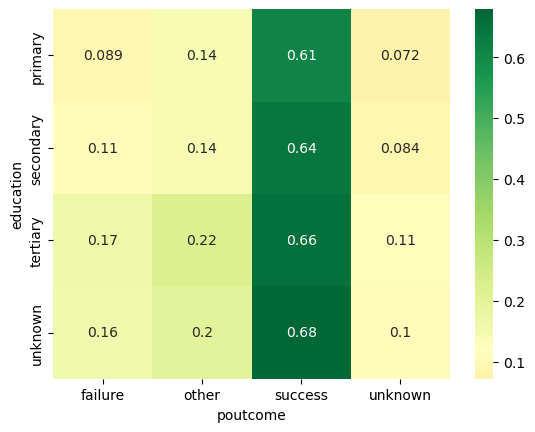

In [99]:
#create the heat map of education vs poutcome vs response_flag.
res = pd.pivot_table(data=inp1, index='education', columns='poutcome', values='response_flag')
sns.heatmap(res, annot=True, cmap='RdYlGn', center=0.117)